## 1. Python data types

### Container types

* list (mutable)
* set (mutable)
* tuple (immutable)

### Dictionaries



## 2. Scope in functions

* Global scope - defined in the main body of the script
* Local scope - defined inside a function. Once the execution of the function is done, any name defined inside the local scope seaces to exist
* Built-in scope - names in the pre-defined built-ins module, such as print()

When we reference a name, first a local scope is searched, then enclosing functions, then global scope, then the built-in scope.

* Local scope
* Enclosing function
* Global
* Built-in

** If we wont to change the the local name in the inner function, we do
                 
                def outer():
                    """ Prints the value of n."""
                    n = 1
                    
                    def inner():
                        nonlocal n
                        n = 2
                        print(n)
                        
                    inner()
                    print(n)
                
                In [1]: outer()
                2
                2

**If we want to locally acces and globally alter the name, we call it within the function this way**
                
                new_val = 1
                
                def square(value):
                    global new_val
                    new_val = value ** 2
                    return new_val
                    
                In [1]: new_val
                1
                In [2]: square(3)
                9
                In [3]: new_val
                9

## 3. Visualizing 2D arrays

To generate 2D arrays we can use NumPy

            import numpy as np
            Y,X = np.meshgrid(range(10),range(20))
            
This will create two arrays with a shape of (20,10), which corresponds to 20 rows along the Y-axis and 10 columns along the X-axis

In [31]:
import numpy as np
import matplotlib.pyplot as plt

u = np.linspace(-2, 2, 3)
v = np.linspace(-1, 1, 5)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4

* linspace creates a 1D array of uniformly spaced values
* meshgrid replicates the 1 dimentional arrays, u and v, along different axis to create 2 dimentional arrays, X and Y. The resulting 2D arrays have the same shape but are constant valued along different axis 

In [32]:
print('Z:\n', Z)

Z:
 [[ 0.41    0.25    0.41  ]
 [ 0.2225  0.0625  0.2225]
 [ 0.16    0.      0.16  ]
 [ 0.2225  0.0625  0.2225]
 [ 0.41    0.25    0.41  ]]


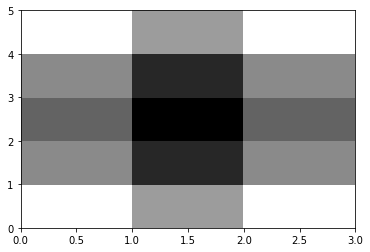

In [33]:
plt.set_cmap('gray')
plt.pcolor(Z)
plt.show()

## 4. Visualizing bivariate functions

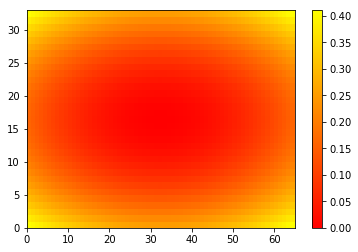

In [37]:
import numpy as np
import matplotlib.pyplot as plt     
    
u = np.linspace(-2, 2, 65)
v = np.linspace(-1, 1, 33)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4
plt.pcolor(Z, cmap='autumn')    ## cmap for the color
plt.colorbar()
plt.show()

* Notice that axis ticks are still integers determined by the dimentions of the matrix Z rather than x, y coordinates used to compute Z
* Fix this by calling the pcolor() with the meshgrid used to construct Z

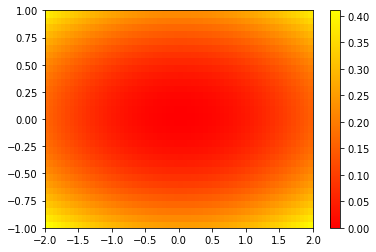

In [38]:
plt.pcolor(X, Y, Z, cmap='autumn')
plt.colorbar()
plt.show()

* pcolor() plots are pixelated (which is good if the data is inherently discontinuous)
* we can use contour() for the function that varies continuously
* specify meshgrid X and Y as arguments to make the x and y axis tick represent the actual values used to construct Z

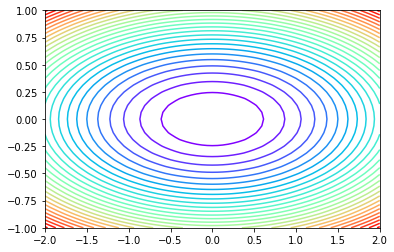

In [39]:
plt.contour(X, Y, Z, 30, cmap='rainbow')  ## draw 30 contours
plt.show()

* use contourf() for filled contour plots

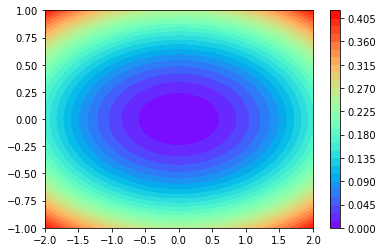

In [40]:
plt.contourf(X, Y, Z, 30, cmap='rainbow')
plt.colorbar()
plt.show()

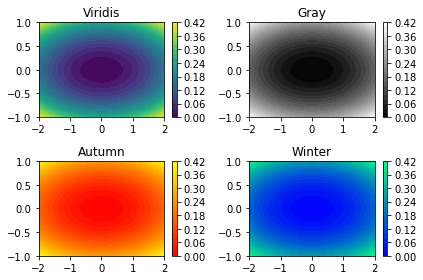

In [46]:
# Create a filled contour plot with a color map of 'viridis'
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap='viridis')
plt.colorbar()
plt.title('Viridis')

# Create a filled contour plot with a color map of 'gray'
plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap='gray')
plt.colorbar()
plt.title('Gray')

# Create a filled contour plot with a color map of 'autumn'
plt.subplot(2,2,3)
plt.contourf(X, Y, Z, 20, cmap='autumn')
plt.colorbar()
plt.title('Autumn')

# Create a filled contour plot with a color map of 'winter'
plt.subplot(2,2,4)
plt.contourf(X, Y, Z, 20, cmap='winter')
plt.colorbar()
plt.title('Winter')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()

## 5. Visualizing bivariate distributions

* Visualize 1D arrays with 1 dimentional histograms, **plt.hist(x)**
* Visualize 2D arrays with 2 dimentional histograms,
    * **plt.hist2d(x, y)** (rectangular bins)
        * x and y are vecors of the same length.
        * can specify number of bins using the argument bins=(nx, ny), where nx is the number of bins to use in the horizontal direction and ny is the number of bins to use in the vertical direction.
        * can specify the rectangular region in which the samples are counted in constructing the 2D histogram. The optional parameter required is range=((xmin, xmax), (ymin, ymax)) where
        * xmin and xmax are the respective lower and upper limits for the variables on the x-axis and
        * ymin and ymax are the respective lower and upper limits for the variables on the y-axis. Notice that the optional range argument can use nested tuples or lists.
    * **plt.hexbin()** to use hexagonal bins instead of rectangular bins
        * The optional gridsize argument (default 100) gives the number of hexagons across the x-direction used in the hexagonal tiling. If specified as a list or a tuple of length two, gridsize fixes the number of hexagon in the x- and y-directions respectively in the tiling.
        * The optional parameter extent=(xmin, xmax, ymin, ymax) specifies rectangular region covered by the hexagonal tiling. In that case, xmin and xmax are the respective lower and upper limits for the variables on the x-axis and ymin and ymax are the respective lower and upper limits for the variables on the y-axis.



## 6. Visualizing Images

Two of the principle commands in matplotlib are
* **plt.imread()** to load an image into 2D array
* **plt.imshow()** to display an image

(367, 557, 4)


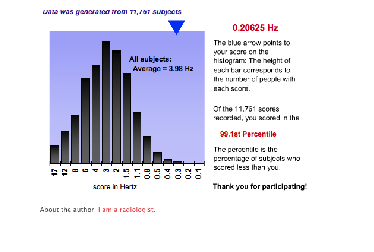

In [57]:
import matplotlib.pyplot as plt

img = plt.imread('companion_files/pitch_score.png')
print(img.shape)
plt.imshow(img)
plt.axis('off')  # hide the axis when displaying the image
plt.show()

* to convert a colored image to a gray scale we can average the RGB channels, taht is apply numpy mean() method along axis 2, the trailing dimention.

(367, 557)


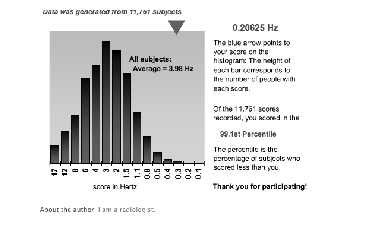

In [62]:
collapsed = img.mean(axis=2)
print(collapsed.shape)
plt.set_cmap('gray')   # subsequent images will all be gray scale
plt.imshow(collapsed, cmap='gray')
plt.axis('off')
plt.show()

(92, 279)


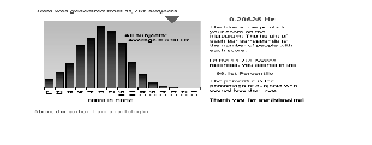

In [63]:
uneven = collapsed[::4, ::2] # nonuniform subsampling, take every 4th row and every 2nd column
print(uneven.shape)
plt.imshow(uneven)
plt.axis('off')
plt.show()

The image displayed is distorted. Because the default assumption is that the pixels have equal width and height. When displaying the unevenly subsampled image, the correct assumption is that the aspect ratio, the ratio of width and height, is 2. The keyword is the **aspect**

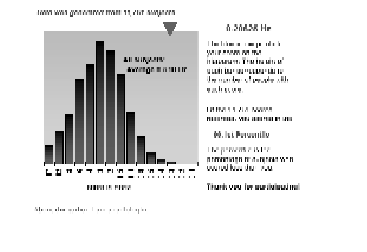

In [65]:
plt.imshow(uneven, aspect=2.0)  ## results in a properly scaled image, can use extent=(__,__,__,__) argument instead of aspect
plt.axis('off')
plt.show()